# Study of the parallel program's effectiveness

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style("darkgrid")

# 1. Non-Scalable
constant problem size

In [2]:
dfa = pd.read_csv('./times_local.csv', header=0)

number of repetitions

In [3]:
dfa.groupby(["z_n", "i", "p"], as_index= False).count()['t'].head(1)

0    3
Name: t, dtype: int64

In [4]:
# ile danych dla danego rozmiaru problemu
ile = dfa.groupby(["z_n"], as_index= False).count()['t'][0]
print(ile)

12


initial data check

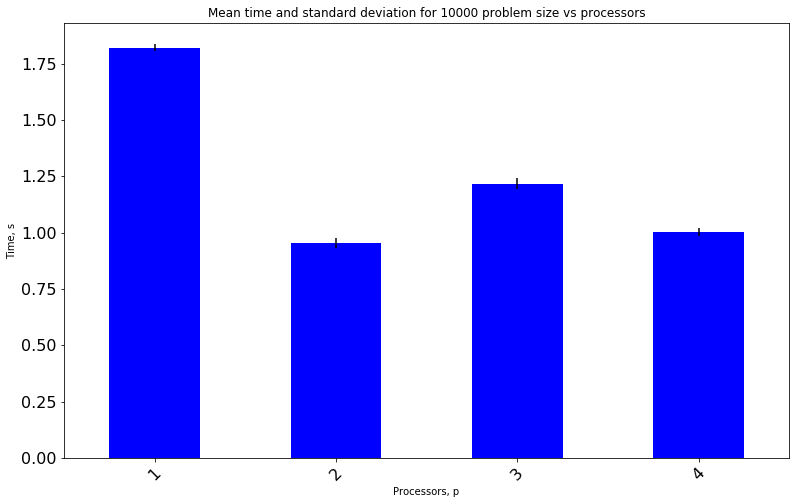

In [5]:
df=dfa[:ile]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*0]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)


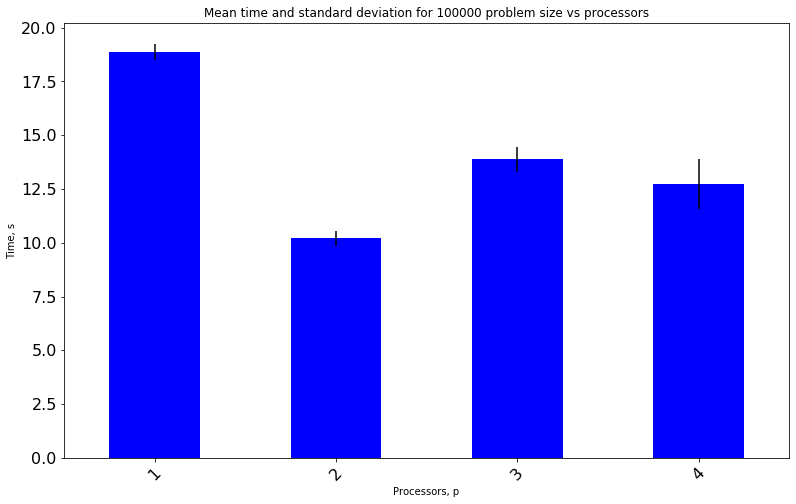

In [6]:
df=dfa[ile:ile*2]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*1]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

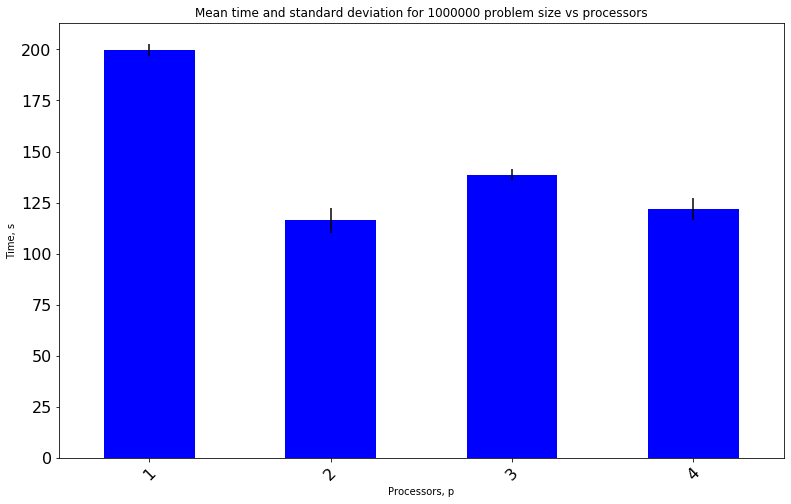

In [7]:
df=dfa[ile*2:ile*3]
std = df.groupby(["p"], as_index= False).std()
std.index+=1
s = df.groupby(["p"], as_index= False).mean()['t']
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for {n} problem size vs processors".format(n=df['n'][ile*2]))
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

## Calculations

In [8]:
ile_p = dfa.groupby(["z_n"], as_index= False).max()['p'][0]
s = dfa.groupby(["z_n","p"], as_index= False).mean()
s['t_1p'] = 0
s['t_1p'][0:ile_p] = s['t'][0]
s['t_1p'][ile_p:ile_p*2] = s['t'][ile_p]
s['t_1p'][ile_p*2:ile_p*3] = s['t'][ile_p*2]
s['speedup'] = s['t_1p']/s['t']
s['effectiveness'] = s['speedup']/s['p']
s

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,z_n,p,n,i,t,t_1p,speedup,effectiveness
0,10000,1,10000,100,1.821019,1.821019,1.000000,1.000000
1,10000,2,10000,100,0.953607,1.821019,1.909611,0.954805
2,10000,3,9999,100,1.216814,1.821019,1.496547,0.498849
3,10000,4,10000,100,1.001736,1.821019,1.817863,0.454466
4,100000,1,100000,100,18.874579,18.874579,1.000000,1.000000
5,100000,2,100000,100,10.200278,18.874579,1.850398,0.925199
6,100000,3,99999,100,13.874501,18.874579,1.360379,0.453460
7,100000,4,100000,100,12.715155,18.874579,1.484416,0.371104
8,1000000,1,1000000,100,199.762043,199.762043,1.000000,1.000000
9,1000000,2,1000000,100,116.353055,199.762043,1.716861,0.858431


# Plots
points connected with lines were used for the charts

the points show accurate results, and the connecting lines allow easier observation of trends

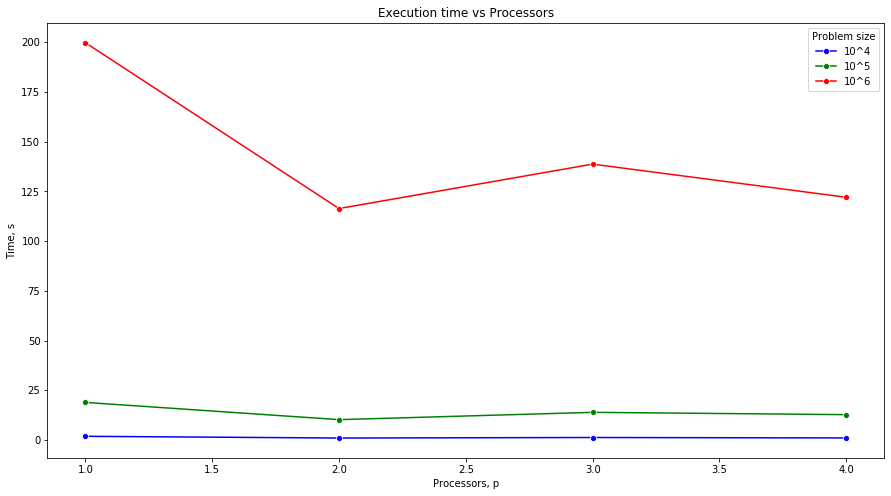

In [9]:
g = sns.lineplot(x="p", y="t", style="z_n", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

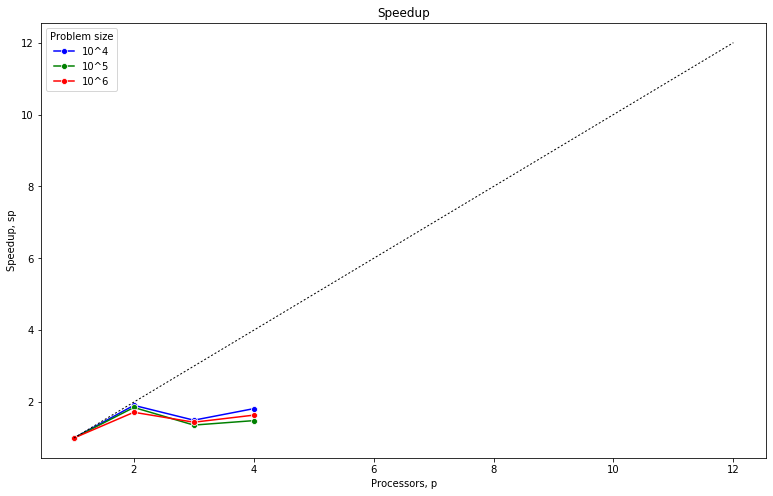

In [10]:
g = sns.lineplot(x="p", y="speedup", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.plot([1, 12], [1, 12], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.figure.set_size_inches(13, 8)

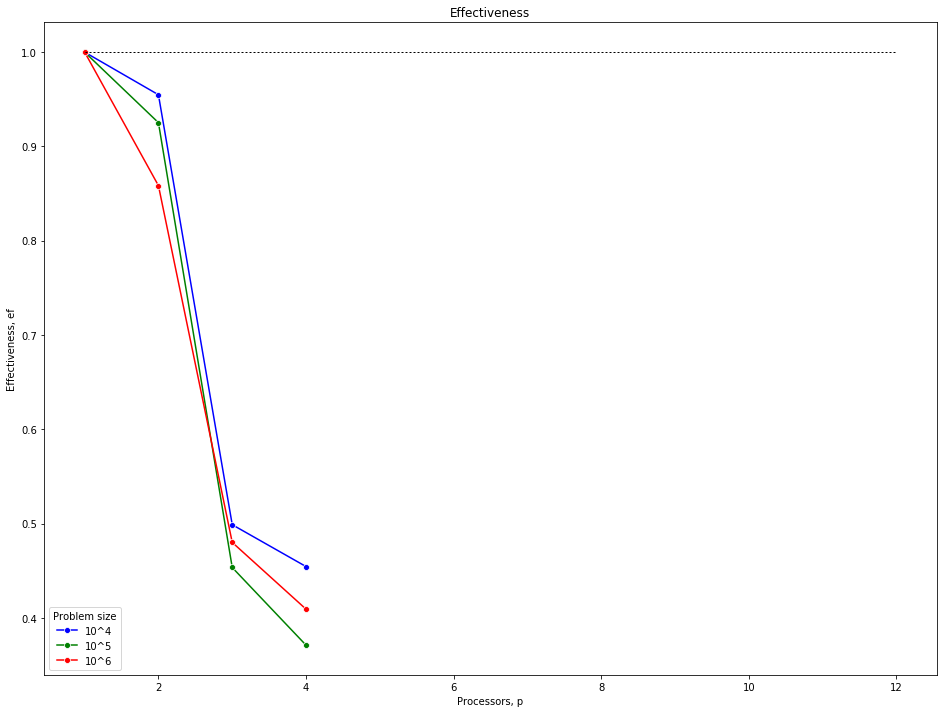

In [11]:
g = sns.lineplot(x="p", y="effectiveness", hue="z_n", palette=["blue","green","red"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
plt.legend(title='Problem size', labels=['10^4', '10^5', '10^6'])
g.plot([1, 12], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)
